# 第2部 実践編 1 : 機械学習

## 第3章 顧客の全体像を把握する10本ノック

### ノック21 : データを読み込んで把握しよう

In [155]:
import pandas as pd

# 利用ログの読み込み
use_log = pd.read_csv('sample_20201021/chapter_003/use_log.csv')

print(len(use_log))

use_log.head()

197428


,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [156]:
# 顧客の読み込み
customer = pd.read_csv('sample_20201021/chapter_003/customer_master.csv')

print(len(customer))

customer.head()

4192


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


In [157]:
# 会員区別マスタデータの読み込み
class_master = pd.read_csv('sample_20201021/chapter_003/class_master.csv')

print(len(class_master))

class_master.head()

3


,class,class_name,price
0,C01,オールタイム,10500
1,C02,デイタイム,7500
2,C03,ナイト,6000


In [158]:
# キャンペーン区分データの読み込み
campaign_master = pd.read_csv('sample_20201021/chapter_003/campaign_master.csv')

print(len(campaign_master))

campaign_master.head()

3


,campaign_id,campaign_name
0,CA1,通常
1,CA2,入会費半額
2,CA3,入会費無料


### ノック22 : 顧客データを整形しよう

In [159]:
# 顧客と会員区別マスタを結合
joined_customer = pd.merge(customer, class_master, on='class', how='left')

# 顧客とキャンペーン区分を結合
joined_customer = pd.merge(joined_customer, campaign_master, on='campaign_id', how='left')

joined_customer

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,ナイト,6000,通常
...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0,オールタイム,10500,通常
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaN,CA1,0,オールタイム,10500,通常
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaN,CA1,0,ナイト,6000,通常
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0,オールタイム,10500,通常


In [160]:
# NULLデータの確認
joined_customer.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

### ノック23 : 顧客データの基礎集計をしよう

In [161]:
# クラスごとの会員数
joined_customer.groupby('class_name')['customer_id'].count()

class_name
オールタイム    2045
デイタイム     1019
ナイト       1128
Name: customer_id, dtype: int64

In [162]:
# キャンペーンごとの会員数
joined_customer.groupby('campaign_name')['customer_id'].count()

campaign_name
入会費半額     650
入会費無料     492
通常       3050
Name: customer_id, dtype: int64

In [163]:
# 性別ごとの会員数
joined_customer.groupby('gender')['customer_id'].count()

gender
F    1983
M    2209
Name: customer_id, dtype: int64

In [164]:
# 退会済みの会員数
joined_customer.groupby('is_deleted')['customer_id'].count()

is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64

In [165]:
# datetimeオブジェクトに変更
joined_customer['start_date'] = pd.to_datetime(joined_customer['start_date'])

# 2018/04/01よりあとに入会した会員を抽出
customer_start = joined_customer.loc[joined_customer['start_date'] > pd.to_datetime('20180401')]

customer_start

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
2831,HI195873,XXX,C01,F,2018-04-02,2018-08-31 00:00:00,CA3,1,オールタイム,10500,入会費無料
2832,TS322485,XX,C03,F,2018-04-02,2018-08-31 00:00:00,CA3,1,ナイト,6000,入会費無料
2833,IK552971,XXXXX,C02,F,2018-04-02,2018-08-31 00:00:00,CA3,1,デイタイム,7500,入会費無料
2834,PL000560,XXX,C01,M,2018-04-02,2018-07-31 00:00:00,CA3,1,オールタイム,10500,入会費無料
2835,HD218970,XXXXX,C01,F,2018-04-02,2018-11-30 00:00:00,CA3,1,オールタイム,10500,入会費無料
...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaN,CA1,0,オールタイム,10500,通常
4188,HD246549,XXXXX,C01,F,2019-03-14,NaN,CA1,0,オールタイム,10500,通常
4189,GD037007,XXXXX,C03,M,2019-03-14,NaN,CA1,0,ナイト,6000,通常
4190,OA953150,XXXXX,C01,M,2019-03-14,NaN,CA1,0,オールタイム,10500,通常


### ノック24 : 最新顧客データの基礎集計をしてみよう

In [166]:
# datetimeオブジェクトに変更
joined_customer['end_date'] = pd.to_datetime(joined_customer['end_date'])

# 2019年03月31日以降にやめた人 | やめていない人
newer_customer = joined_customer.loc[
    (joined_customer['end_date'] >= pd.to_datetime('20190331')) |
    (joined_customer['end_date'].isna())
]

newer_customer

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常
...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,オールタイム,10500,通常
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,オールタイム,10500,通常
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,ナイト,6000,通常
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,オールタイム,10500,通常


In [167]:
newer_customer.groupby('class_name')['customer_id'].count()

class_name
オールタイム    1444
デイタイム      696
ナイト        813
Name: customer_id, dtype: int64

In [168]:
newer_customer.groupby('campaign_name')['customer_id'].count()

campaign_name
入会費半額     311
入会費無料     242
通常       2400
Name: customer_id, dtype: int64

In [169]:
newer_customer.groupby('gender')['customer_id'].count()

gender
F    1400
M    1553
Name: customer_id, dtype: int64

### ノック25 : 利用履歴データを集計しよう

In [170]:
use_log['usedate'] = pd.to_datetime(use_log['usedate'])
use_log['年月'] = use_log['usedate'].dt.strftime('%Y%m')

use_log_months = use_log.groupby(['年月', 'customer_id'], as_index=False).count()

# usedate列を消す
use_log_months = use_log_months.drop(['usedate'], axis=1)

# 
use_log_months.rename(columns={'log_id':'count'}, inplace=True)

use_log_months

,年月,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7
...,...,...,...
36837,201903,TS995853,8
36838,201903,TS998593,8
36839,201903,TS999079,3
36840,201903,TS999231,6


In [171]:
use_log_customer = use_log_months.groupby('customer_id').agg(['mean', 'median', 'max', 'min'])['count']

use_log_customer

,mean,median,max,min
customer_id,,,,
AS002855,4.500000,5.0,7,2
AS008805,4.000000,4.0,8,1
AS009013,2.000000,2.0,2,2
AS009373,5.083333,5.0,7,3
AS015233,7.545455,7.0,11,4
...,...,...,...,...
TS995853,9.500000,9.5,11,8
TS998593,8.142857,8.0,9,7
TS999079,4.916667,5.5,9,2


### ノック26 : 利用履歴データから定期利用フラグを作成しよう

In [172]:
use_log['weekday'] = use_log['usedate'].dt.weekday

use_log['weekday']


0         6
1         6
2         6
3         6
4         6
         ..
197423    6
197424    6
197425    6
197426    6
197427    6
Name: weekday, Length: 197428, dtype: int64

In [173]:
use_log_weekday = use_log.groupby(['customer_id', '年月', 'weekday'], as_index=False).count()[['customer_id', '年月', 'weekday', 'log_id']]

use_log_weekday.rename(columns={'log_id' : 'count'}, inplace=True)

use_log_weekday 

,customer_id,年月,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1
...,...,...,...,...
93328,TS999855,201901,1,1
93329,TS999855,201901,5,4
93330,TS999855,201901,6,1
93331,TS999855,201902,5,4


In [174]:
use_log_weekday = use_log_weekday.groupby(['customer_id'], as_index=False).max()[['customer_id', 'count']]

use_log_weekday 

,customer_id,count
0,AS002855,5
1,AS008805,4
2,AS009013,2
3,AS009373,5
4,AS015233,5
...,...,...
4187,TS995853,5
4188,TS998593,5
4189,TS999079,5
4190,TS999231,5


In [175]:
use_log_weekday['routing_flg'] = 0

use_log_weekday

,customer_id,count,routing_flg
0,AS002855,5,0
1,AS008805,4,0
2,AS009013,2,0
3,AS009373,5,0
4,AS015233,5,0
...,...,...,...
4187,TS995853,5,0
4188,TS998593,5,0
4189,TS999079,5,0
4190,TS999231,5,0


In [176]:
use_log_weekday['routing_flg'] = use_log_weekday['routing_flg'].where(use_log_weekday['count'] < 4, 1)

use_log_weekday

,customer_id,count,routing_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1
...,...,...,...
4187,TS995853,5,1
4188,TS998593,5,1
4189,TS999079,5,1
4190,TS999231,5,1


### ノック27 : 顧客データと利用履歴データを結合しよう

In [177]:
joined_customer = pd.merge(joined_customer, use_log_customer, on='customer_id', how='left')

joined_customer.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1


In [178]:
joined_customer = pd.merge(joined_customer, use_log_weekday[['customer_id', 'routing_flg']], on='customer_id', how='left')

joined_customer.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routing_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,1


In [179]:
joined_customer.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
max                 0
min                 0
routing_flg         0
dtype: int64

### ノック28 : 会員期間を計算しよう

In [180]:
from dateutil.relativedelta import relativedelta

joined_customer['calc_date'] = joined_customer['end_date']

# calc_date が nan のやつに、2019/04/30 を代入する
joined_customer['calc_date'] = joined_customer['calc_date'].fillna(pd.to_datetime('20190430'))

# 会員期間 の初期化
joined_customer['membership_period'] = 0

for i in range(len(joined_customer)):
    
    datetime_delta = relativedelta(
        joined_customer['calc_date'].iloc[i],
        joined_customer['start_date'].iloc[i]
    )
    
    joined_customer.loc[i, 'membership_period'] = datetime_delta.years * 12 + datetime_delta.months

joined_customer.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routing_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,1,2019-04-30,47


### ノック29 : 顧客行動の各種統計量を把握しよう

In [181]:
joined_customer[['mean', 'median', 'max', 'min']].describe()

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <BarContainer object of 10 artists>)

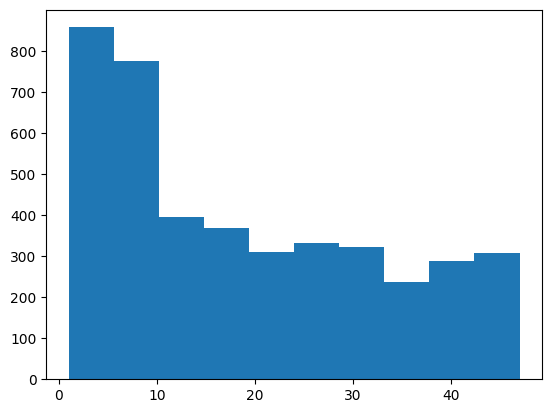

In [182]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.hist(joined_customer['membership_period'])

### ノック30 : 退会ユーザと継続ユーザの違いを把握しよう

In [183]:
end_customer = joined_customer.loc[joined_customer['is_deleted'] == 1]

end_customer.describe()

,is_deleted,price,mean,median,max,min,routing_flg,membership_period
count,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,1.0,8595.555556,3.865474,3.621852,6.461481,1.821481,0.456296,8.026667
std,0.0,1949.163652,1.246385,1.270847,2.584021,0.976361,0.498271,5.033692
min,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.0,6000.000000,3.000000,3.000000,4.000000,1.000000,0.000000,4.000000
50%,1.0,7500.000000,4.000000,4.000000,7.000000,2.000000,0.000000,7.000000
75%,1.0,10500.000000,4.666667,4.500000,8.000000,2.000000,1.000000,11.000000
max,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,1.000000,23.000000


In [184]:
stay_customer = joined_customer.loc[joined_customer['is_deleted'] == 0]

stay_customer.describe()

,is_deleted,price,mean,median,max,min,routing_flg,membership_period
count,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,0.0,8542.927516,6.030288,6.024279,8.471147,3.620690,0.984166,23.970443
std,0.0,1977.189779,1.553587,1.599765,1.571048,2.030488,0.124855,13.746761
min,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,0.000000,1.000000
25%,0.0,6000.000000,4.833333,5.000000,7.000000,2.000000,1.000000,12.000000
50%,0.0,7500.000000,5.583333,5.500000,8.000000,3.000000,1.000000,24.000000
75%,0.0,10500.000000,7.178030,7.000000,10.000000,5.000000,1.000000,35.000000
max,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,47.000000


In [185]:
joined_customer.to_csv('sample_20201021/chapter_003/joined_customer.csv')